In [3]:

import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
rng = np.random.default_rng()




# Using Scipy

Source: 

In [ ]:


fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = rng.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise



In [ ]:


frequencies, times, spectrogram = signal.spectrogram(x=x, fs=1.)


In [ ]:

plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


In [ ]:

f, t, Sxx = signal.spectrogram(x, fs, return_onesided=False)

plt.pcolormesh(t, fftshift(f), fftshift(Sxx, axes=0), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()



In [ ]:

f.shape



In [ ]:


t.shape



In [ ]:

Sxx.shape



# Using Librosa

Source: https://importchris.medium.com/how-to-create-understand-mel-spectrograms-ff7634991056

In [4]:


import librosa
# import librosa.display
import numpy as np
import matplotlib.pyplot as plt
signal, sr = librosa.load(librosa.util.example('brahms'))



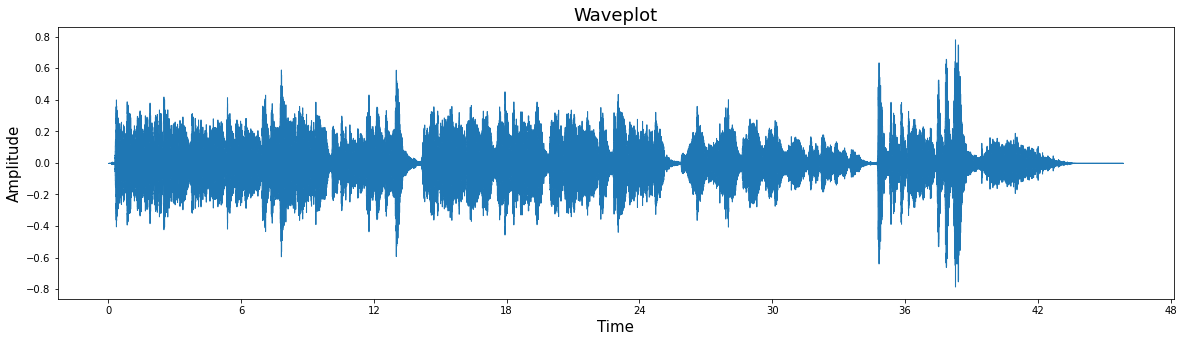

In [6]:


plt.figure(figsize=(20, 5))
librosa.display.waveshow(signal, sr=sr)
plt.title('Waveplot', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Amplitude', fontdict=dict(size=15))
plt.show()



In [ ]:

import IPython.display as ipd
ipd.Audio(signal, rate=sr)



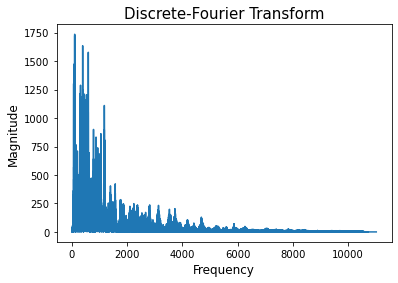

In [9]:


# Creating a Discrete-Fourier Transform with our FFT algorithm
fast_fourier_transf = np.fft.fft(signal)

# Magnitudes indicate the contribution of each frequency
magnitude = np.abs(fast_fourier_transf)

# mapping the magnitude to the relative frequency bins
frequency = np.linspace(0, sr, len(magnitude))

# We only need the first half of the magnitude and frequency
left_mag = magnitude[:int(len(magnitude)/2)]
left_freq = frequency[:int(len(frequency)/2)]


plt.plot(left_freq, left_mag)
plt.title('Discrete-Fourier Transform', fontdict=dict(size=15))
plt.xlabel('Frequency', fontdict=dict(size=12))
plt.ylabel('Magnitude', fontdict=dict(size=12))
plt.show()





The only issue with a DFT is the fact that it is static — there is no time associated with this plot. So to incorporate time into our audio to see what frequencies impact at what time, we should make a spectrogram.


## Short-time Fourier Transformation Algorithm



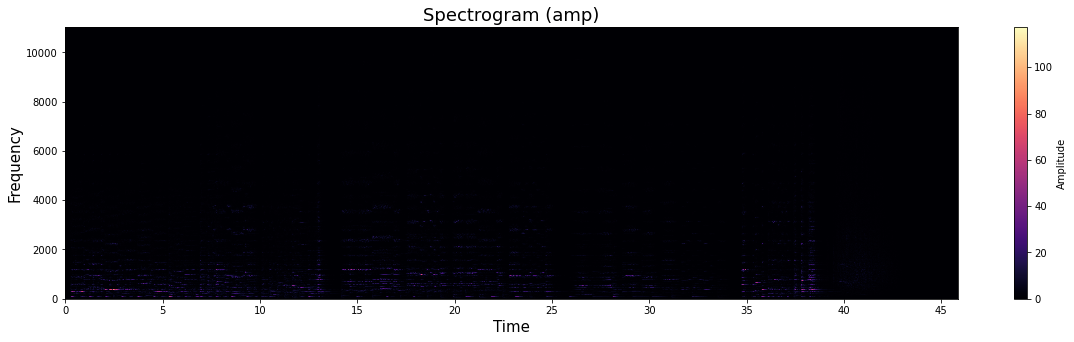

In [11]:


# this is the number of samples in a window per fft
n_fft = 2048

# The amount of samples we are shifting after each fft
hop_length = 512

# Short-time Fourier Transformation on our audio data
audio_stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)

# gathering the absolute values for all values in our audio_stft
spectrogram = np.abs(audio_stft)

# Plotting the short-time Fourier Transformation
plt.figure(figsize=(20, 5))

# Using librosa.display.specshow() to create our spectrogram
librosa.display.specshow(
    spectrogram, sr=sr, x_axis='time',
    y_axis='hz', hop_length=hop_length
)

plt.colorbar(label='Amplitude')
plt.title('Spectrogram (amp)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()





As we can see (or more accurately, not see), most of these frequencies contribute very little to the overall amplitude of the sound. A way for us to visualize loudness, which is not linear but logarithmic, is to convert our spectrograms from amplitude to decibels.


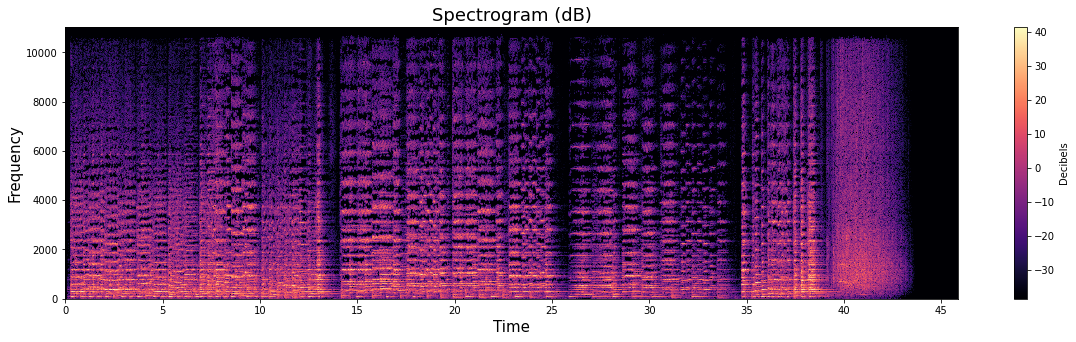

In [12]:


# Short-time Fourier Transformation on our audio data
audio_stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)

# gathering the absolute values for all values in our audio_stft 
spectrogram = np.abs(audio_stft)

# Converting the amplitude to decibels
log_spectro = librosa.amplitude_to_db(spectrogram)

# Plotting the short-time Fourier Transformation
plt.figure(figsize=(20, 5))

# Using librosa.display.specshow() to create our spectrogram
librosa.display.specshow(
    log_spectro, sr=sr,
    x_axis='time', y_axis='hz',
    hop_length=hop_length, cmap='magma'
)

plt.colorbar(label='Decibels')
plt.title('Spectrogram (dB)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()





## Creating the Mel-Spectrogram

The difference between a spectrogram and a Mel-spectrogram is that a Mel-spectrogram converts the frequencies to the mel-scale. According to the University of California, the mel-scale is “a perceptual scale of pitches judged by listeners to be equal in distance from one another”. If you are familiar with playing or reading music, this may help you visualize and understand the conversion and reasoning. Let’s go ahead and picture this as notes on a musical scale:


- From C to D is one whole step, and from D to E is another whole step. Perceptually to the human ears, the step sizes are equal.

- However, if we were to compare these steps in hertz, they would not be equal steps. A C is around 261.63 Hz, a D is 293.66 Hz, and an E is 329.63 Hz.

- C to D difference = 32.03 Hz
- D to E difference = 35.37 Hz

As the notes go higher in octave, the difference between the steps dramatically increases. Mel-spectrograms provide a perceptually relevant amplitude and frequency representation. Let’s go ahead and plot a Mel-spectrogram.
mel_signal = librosa.feature.melspectrogram(y=signal, sr=sr, hop_length=hop_length, 
 n_fft=n_fft)
spectrogram = np.abs(mel_signal)
power_to_db = librosa.power_to_db(spectrogram, ref=np.max)
plt.figure(figsize=(8, 7))
librosa.display.specshow(power_to_db, sr=sr, x_axis=’time’, y_axis=’mel’, cmap=’magma’, 
 hop_length=hop_length)
plt.colorbar(label=’dB’)
plt.title('Mel-Spectrogram (dB)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()

Brahm’s Hungarian Dance №5 in a Mel-Spectrogram plot
As we can see, the Mel-spectrogram provides more information in the image of our audio file. Providing our convolutional neural network model with more information through our Mel-spectrograms allows the model to better differentiate between whatever classes we are training on.
“Librosa — Librosa 0.8.0 Documentation.” Librosa, librosa.org/doc/latest/index.html. Accessed 7 Apr. 2021.
Smyth, Tamara. “The Mel Scale.” University of California, San Diego, Tamara Smyth, 4 June 2019, musicweb.ucsd.edu/~trsmyth/pitch2/Mel_Scale.html.




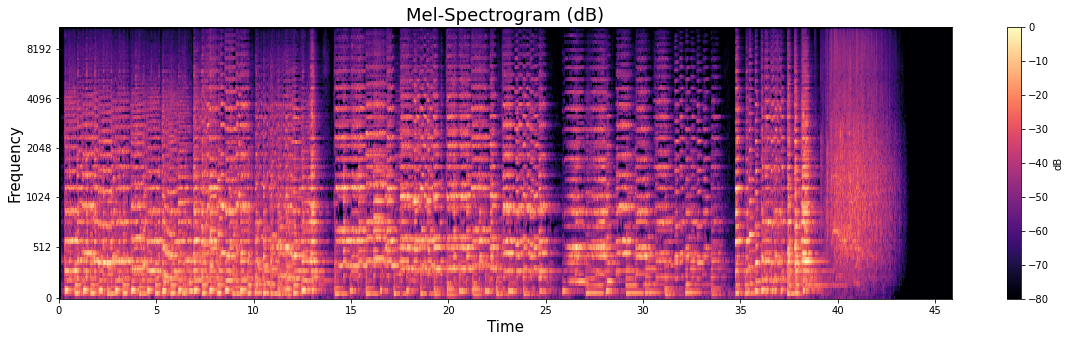

In [15]:


mel_signal = librosa.feature.melspectrogram(
    y=signal, sr=sr, hop_length=hop_length, n_fft=n_fft
)

spectrogram = np.abs(mel_signal)
power_to_db = librosa.power_to_db(spectrogram, ref=np.max)

plt.figure(figsize=(20, 5))
librosa.display.specshow(
    power_to_db, sr=sr, x_axis='time',
    y_axis='mel', cmap='magma',
    hop_length=hop_length
)

plt.colorbar(label='dB')
plt.title('Mel-Spectrogram (dB)', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=15))
plt.show()

